# Loading Dataset

In [350]:
import pandas as pd

data = pd.read_csv('../data/raw/abalone-1.data', header=None, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [351]:
# Adding age to the dataset
data['Age'] = data['Rings'] + 1.5

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


# Descriptive Stats

In [352]:
print("Data Info:")
print(data.info())

print("\n\nDescriptive Statistics:")
print(data.describe())

print("\n\nMissing Values:")
print(data.isnull().sum())

print("\nNumber of duplicate rows:", data.duplicated().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB
None


Descriptive Statistics:
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.1

In [353]:
if data['Sex'].dtype == 'object':
    data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})

data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [354]:
# Checking For Duplicates
print('Duplicated Rows: ', data.duplicated().sum())

Duplicated Rows:  0


In [355]:
# Checking for null values
print('Null Values: ', data.isnull().sum().sum())

Null Values:  0


## Comments

#### Overview
- Data contains 4177 entries, with 9 columns
- There are no null values in all the columns
- There are no duplicate rows
- Minimum Values for height is 0, which is an anamoly, so need to recheck

#### Next Steps
- Explore measurement values, to detect more anamolies (e.g if there are any 0 or negative values)

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns

# Array of continuous variables
continuous_vars = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# Checking for 0 or negative values in continuous variables
for vars in continuous_vars:
    print("0 or Negative values in", vars, ":", (data[vars] <= 0).sum())

0 or Negative values in Length : 0
0 or Negative values in Diameter : 0
0 or Negative values in Height : 2
0 or Negative values in Whole weight : 0
0 or Negative values in Shucked weight : 0
0 or Negative values in Viscera weight : 0
0 or Negative values in Shell weight : 0


In [357]:
#Removing rows with 0 or negative values in continuous variables
data = data[(data[continuous_vars] > 0).all(axis=1)]

# Checking for 0 or negative values in continuous variables
for vars in continuous_vars:
    print("0 or Negative values in", vars, ":", (data[vars] <= 0).sum())
    

0 or Negative values in Length : 0
0 or Negative values in Diameter : 0
0 or Negative values in Height : 0
0 or Negative values in Whole weight : 0
0 or Negative values in Shucked weight : 0
0 or Negative values in Viscera weight : 0
0 or Negative values in Shell weight : 0


# Visualizing Continuos Variables

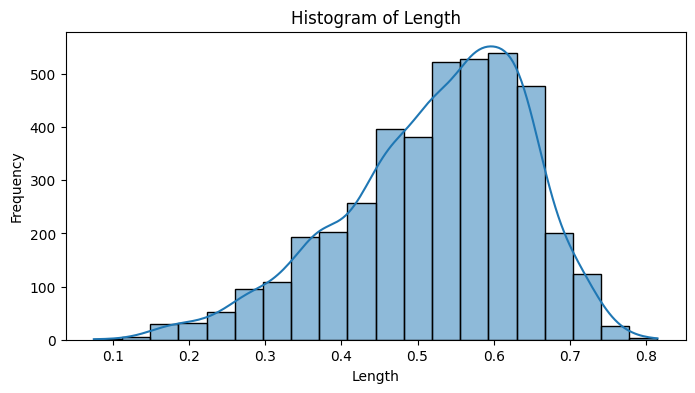

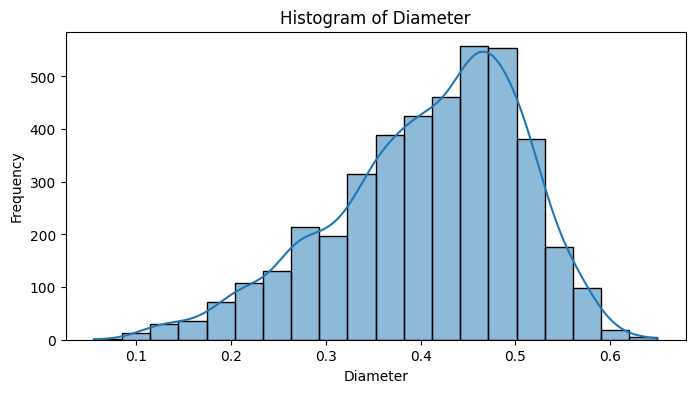

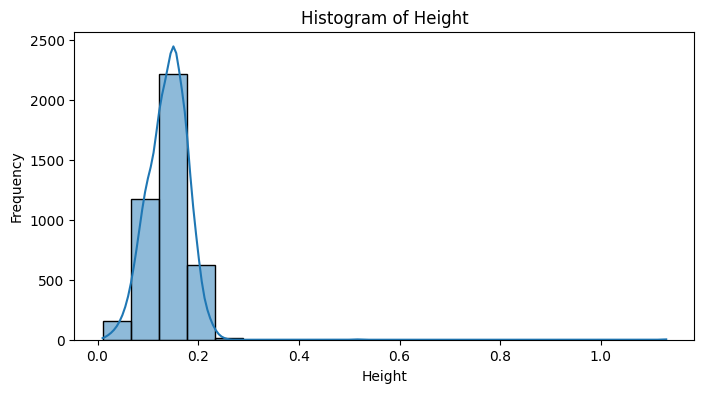

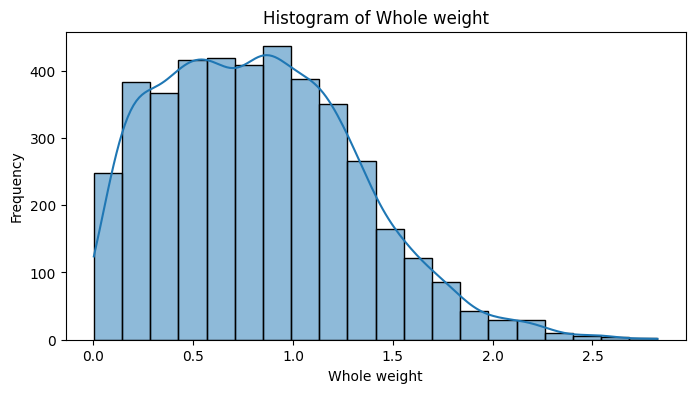

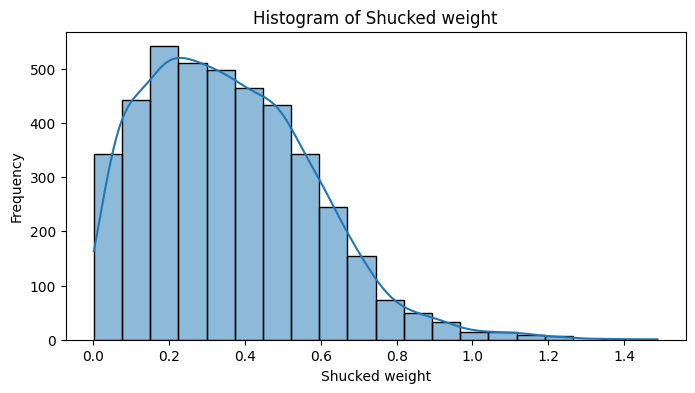

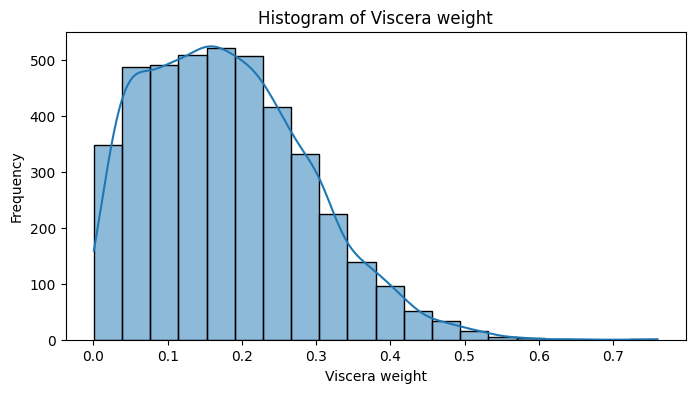

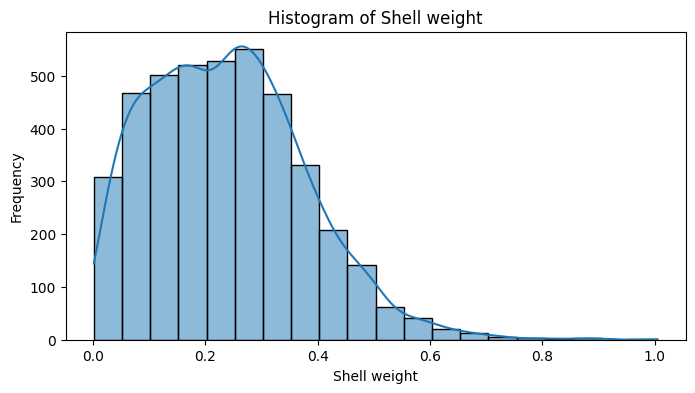

In [358]:


for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[var], bins=20, kde=True)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


## Comments

### Histogram
- Nothing seems to be drastically incorrect. There is visibile skewness, but it is normal

#### Next Steps
- Now we will visualise these variables in Box Plot to watchout for any outliers

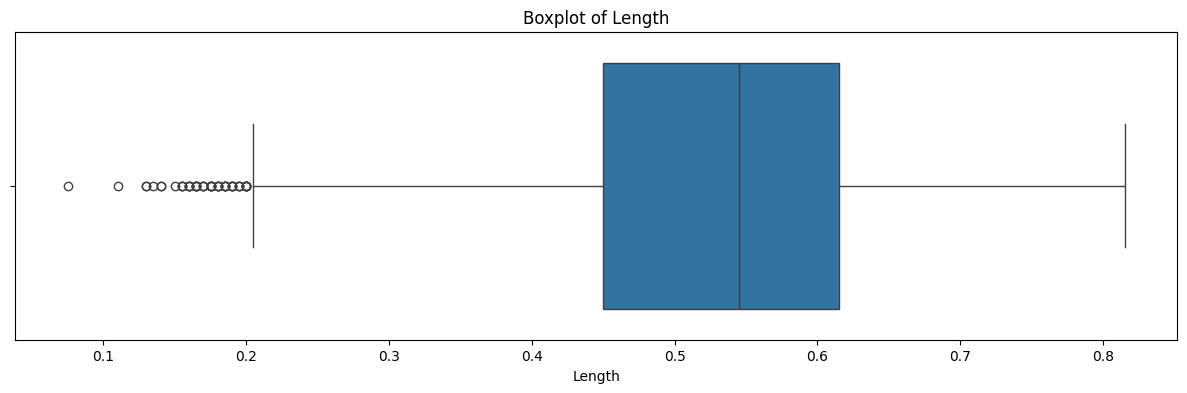

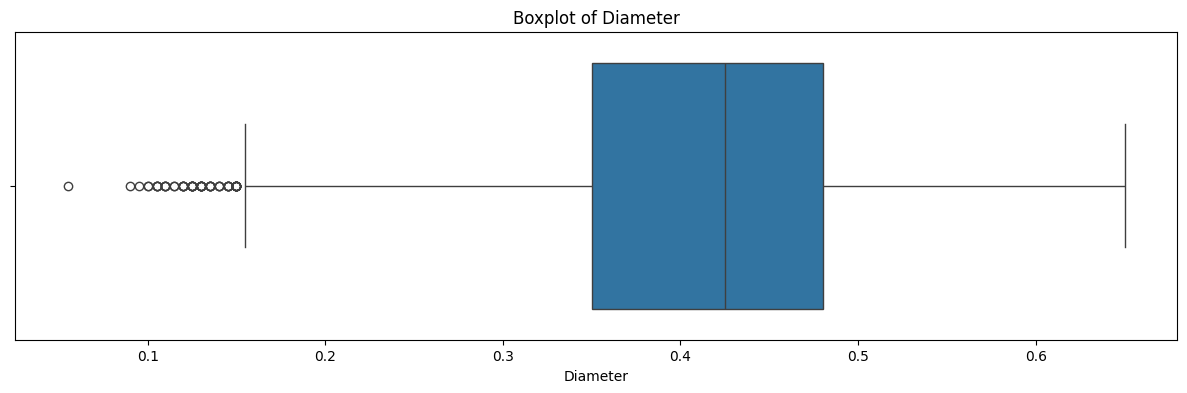

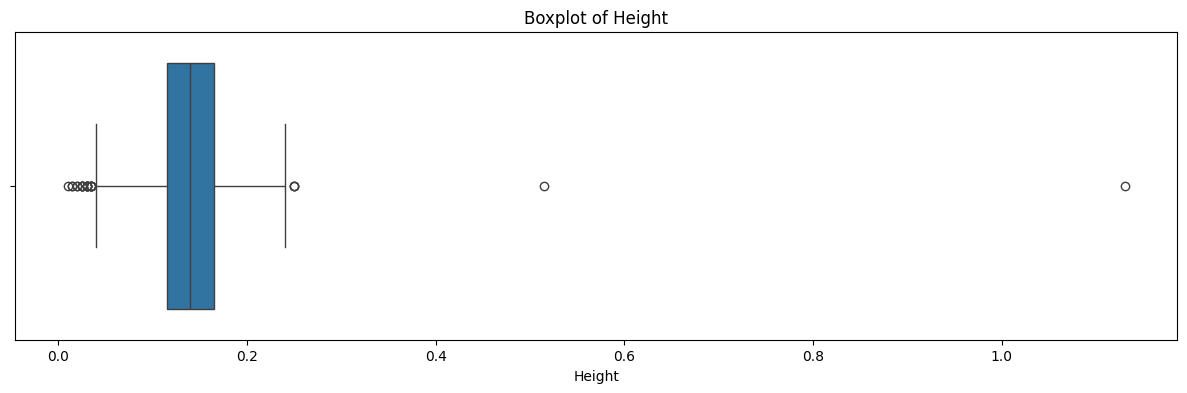

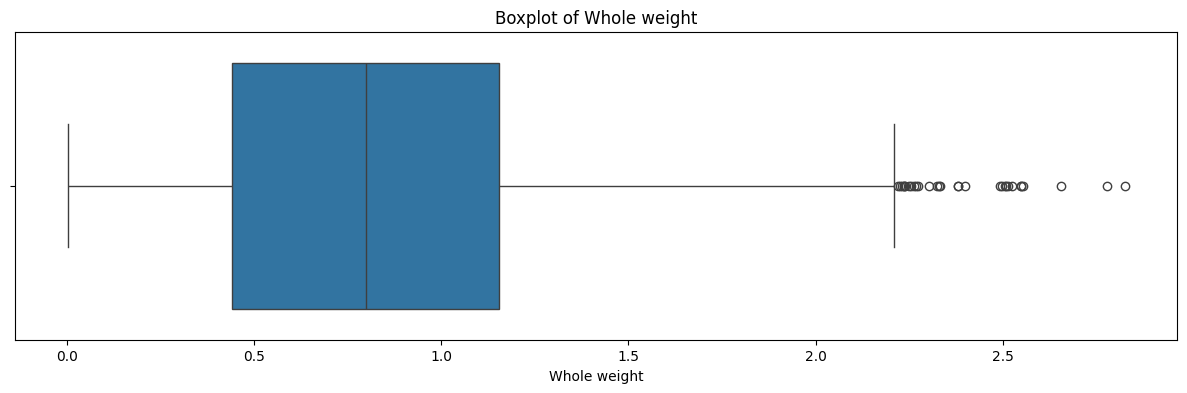

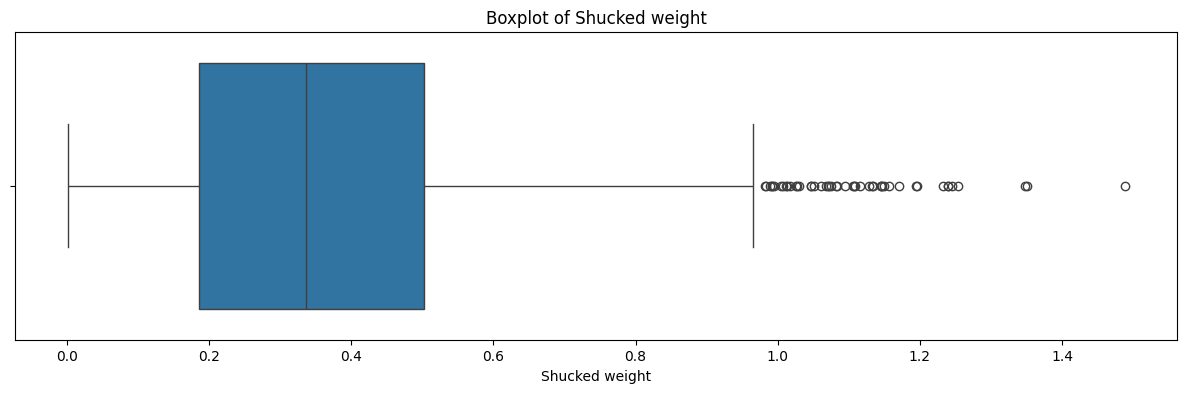

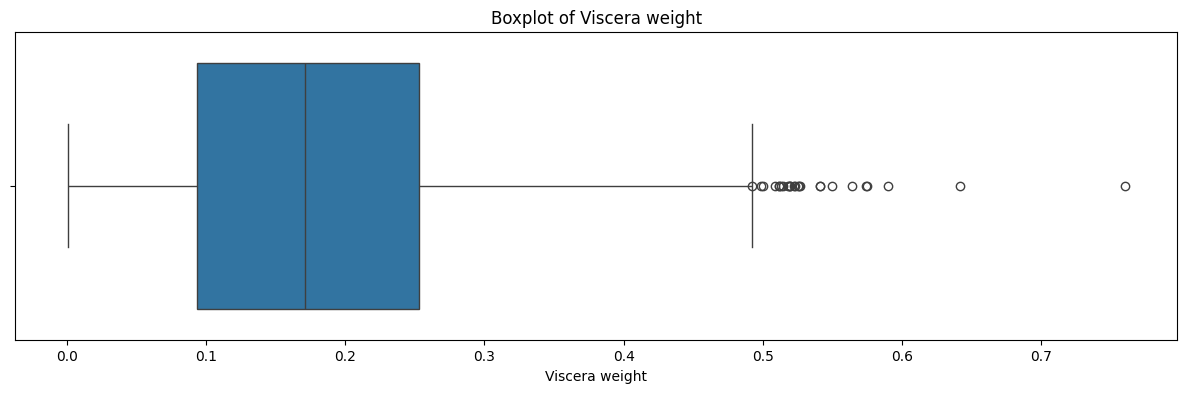

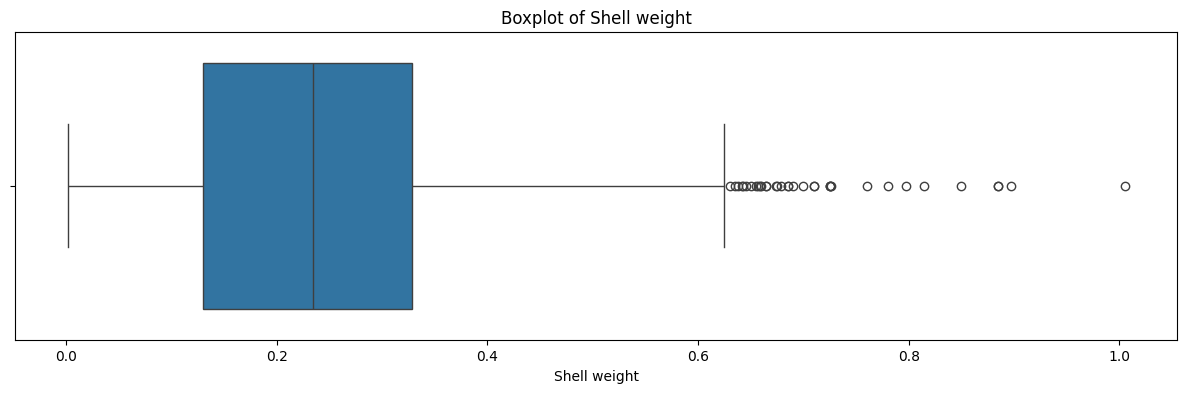

In [359]:
# Creating Boxplots for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(15, 4))
    sns.boxplot(x=data[var])
    plt.title(f"Boxplot of {var}")
    plt.xlabel(var)
    plt.show()

In [360]:


# Sum of total Height above 0.4
print('Total Rows for Height above 0.4: ',(data['Height'] > 0.4).sum())

#Investigating the values of those 2 rows
print(data[data['Height'] > 0.4])




Total Rows for Height above 0.4:  2
      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1417    0   0.705     0.565   0.515         2.210          1.1075   
2051    1   0.455     0.355   1.130         0.594          0.3320   

      Viscera weight  Shell weight  Rings   Age  
1417          0.4865        0.5120     10  11.5  
2051          0.1160        0.1335      8   9.5  


<Axes: xlabel='Height'>

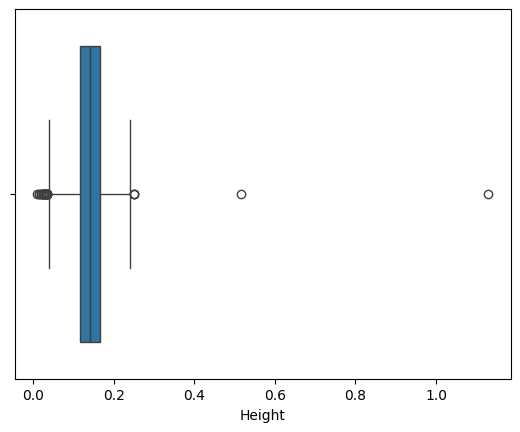

In [361]:
sns.boxplot(x=data['Height'])

In [362]:
# Removing Extreme Values
data = data[data['Height'] <= 0.4]

# # Removing outliers using Z-score
# from scipy.stats import zscore

# z_scores = zscore(data['Height'])
# abs_z_scores = abs(z_scores)
# filtered_entries = (abs_z_scores < 3)
# data = data[filtered_entries]

# sns.boxplot(x=data['Height'])


## Comment

- Although there were outliers present in the dataset, most of it was noise.
- There was extreme outliers present in Height, which was removed using Z-score method, due to height being normally distributed

In [363]:
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,10.5
